# Anomaly Detection using Autoencoders

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

In [3]:
# Normalize data to range [0,1]
x_train, x_test = x_train / 255.0, x_test / 255.0


In [4]:
# Reshape for the autoencoder
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
# Build the Autoencoder model
def build_autoencoder():
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), padding='same'),
        layers.Conv2D(16, (3,3), activation='relu', padding='same'),
        layers.MaxPooling2D((2,2), padding='same'),
        
        layers.Conv2D(16, (3,3), activation='relu', padding='same'),
        layers.UpSampling2D((2,2)),
        layers.Conv2D(32, (3,3), activation='relu', padding='same'),
        layers.UpSampling2D((2,2)),
        layers.Conv2D(1, (3,3), activation='sigmoid', padding='same')
    ])
    return model


In [6]:
# Compile and train the model
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test, x_test))


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - loss: 0.2115 - val_loss: 0.0811
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0800 - val_loss: 0.0753
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0753 - val_loss: 0.0729
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - loss: 0.0732 - val_loss: 0.0716
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0720 - val_loss: 0.0706
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0711 - val_loss: 0.0699
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - loss: 0.0704 - val_loss: 0.0695
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0698 - val_loss: 0.0693
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 37ms/step - loss: 0.0694 - val_loss: 0.0685
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - loss: 0.0691 - val_loss: 0.0682


In [7]:
# Reconstruct images
decoded_imgs = autoencoder.predict(x_test[:10])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


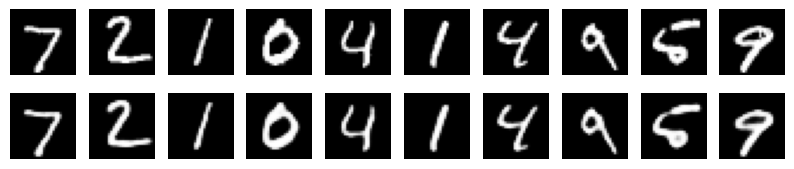

In [8]:
# Plot original and reconstructed images
fig, axes = plt.subplots(2, 10, figsize=(10,2))
for i in range(10):
    axes[0, i].imshow(x_test[i].reshape(28, 28), cmap='gray')
    axes[0, i].axis('off')
    axes[1, i].imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    axes[1, i].axis('off')
plt.show()